## Aprendizagem de máquina

### Objetivos

  - Avaliar os conceitos de aprendizado de maquina aprendidos no curso


# Desafio

Você foi contratado por uma empresa inovadora do ramo imobiliario como `QuintoAndar, Loft, Terraz, grupo Zap (ZAP, Viva Real, DataZAP, FipeZAP, SuaHouse, Geoimóvel, Sub100 e Conecta Imobi) ou Imobi Conference`. O seu desafio está no apio à tomada de decisão baseada em dados (empresa data driven). 

Nesse sentido, use a base de dados **aptos.csv** para realizar a descoberta do conhecimento e responder a pergunta: 

**`Quanto vale um apartamento de 65m2 com 2 quartos, 2 vagas, reformado no Centro?`**


### Orientações

Siga as instruções, completando e construindo os algoritmos necessários.

Nas celulas` Seu Código aqui...` significa que é necessário realizar a implementação de algum código. Utilize quantos blocos(células) julgar necessário para criar o código.

Nas celulas `Responda` significa que é nessário uma resposta clara e objetiva (pode ser por texto, código, gráfico, imagem...) para a pergunta.

## Rubrica para avaliação
    
Os critérios de avaliação do projeto segue conforme a rubrica.

- R1: Exploração de Dados (Até 2 pontos)
- R2: Análise Descritiva de Dados (Até 2 pontos)
- R3: Desenvolvimento do Modelo (Até 2 pontos)
- R4: Treinamento e Teste do Modelo (Até 2 pontos)
- R5: Conclusões Finais (Até 2 pontos)

**Nota_final = R1 + R2 + R3 + R4 + R5**

# 1. Exploração de Dados

Carregue o dataset e faça uma inspeção nas 15 primeiras linhas para identificação básica dos atributos.


In [982]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [983]:
# Carregando o dataset

df = pd.read_csv('aptos.csv')

df.head(15)

,metros,valor,quartos,vagas,reformado,bairro
0,107,560,3,2,0,Vila Lusitania
1,107,555,3,2,1,Vila Lusitania
2,49,196,2,1,0,Ferrazopolis
3,104,515,3,2,1,Centro
4,92,560,3,2,1,Vila Lusitania
5,51,249,2,1,0,Taboao
6,140,635,4,3,1,Centro
7,50,210,2,1,1,Demarchi
8,93,450,3,2,0,Baeta Neves
9,107,425,3,2,1,Rudge Ramos


In [984]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   metros     100 non-null    int64 
 1   valor      100 non-null    int64 
 2   quartos    100 non-null    int64 
 3   vagas      100 non-null    int64 
 4   reformado  100 non-null    int64 
 5   bairro     100 non-null    object
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


### `Pergunta:` Apresente uma breve descrição do significado de cada atributo:

Exemplo:
- Idade: Idade em anos da pessoa
- Marca: fabricante de carros
- Combustivel: tipo de combustível (gasolina, disel...)
- Especie: Tipo de flor iris-setosa, virginica... (Variável Alvo)






**Resposta:**

-   metros: tamanho em metros quadrados de cada imóvel (int)
-   valor: valor por metro quadrado de cada imóvel (int)
-   quartos: número de quartos de cada imóvel (int)
-   vagas: número de vagas de garagem de cada imóvel (int)
-   reformado: se o imóvel está ou nao reformado, sendo 0 para não reformado e 1 para reformado (int)
-   bairro: em qual bairro se encontra cada imóvel (obj)

**Pergunta:** Cite 2 cenários que podem fazer sentido na leitura dos dados apresentados.

Exemplo: 
- Eu acho que o preço da gasolina sobe com o preço do petróleo. 
- Eu acho que na média homens são mais altos que mulheres na mesma faixa etaria.  

**Resposta:**

1.  As maiores correáções são metros x valor e metros x quartos.
2.  O valor do imóvel aumenta quanto maior for sua metragem (metros).
3.  Os imóveis mais caros tem mais de 3 quartos.


## 2. Análise descritiva de dados

Faça uma análise exploratória dos dados. Utilize-se de gráficos e tabelas auxiliares, faça correlações entre os atributos.... Com o objetivo validar as afirmações levantadas acima.

<AxesSubplot:>

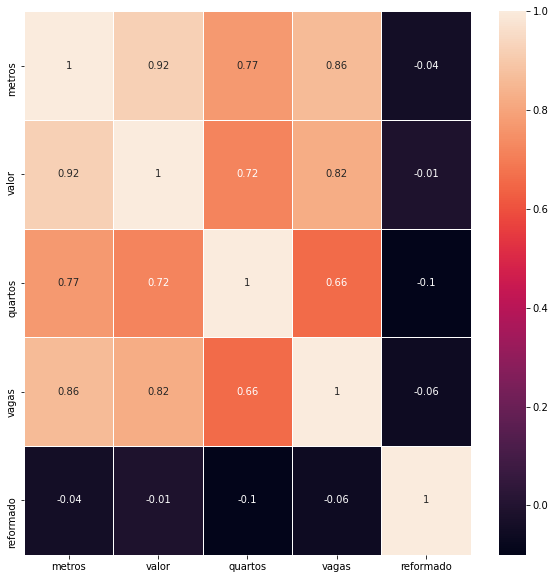

In [985]:
#Seu Código aqui...

## Matriz de correlação comprova que as maiores correlações são: metros x valor e metros x vagas.

import seaborn as sns 
correlation_matrix = df.corr().round(2)

fig, ax = plt.subplots(figsize=(10,10))    
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

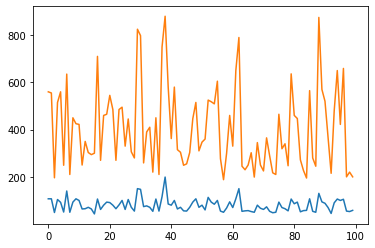

In [986]:
## Gráfico de relação entre metros x valor 
plt.plot(df['metros'])
plt.plot(df['valor'])

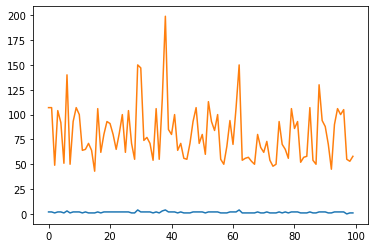

In [987]:
## Gráfico de relação entre vagas x metros 
plt.plot(df['vagas'])
plt.plot(df['metros'])

<AxesSubplot:title={'center':'Vagas x Metros'}, xlabel='vagas', ylabel='metros'>

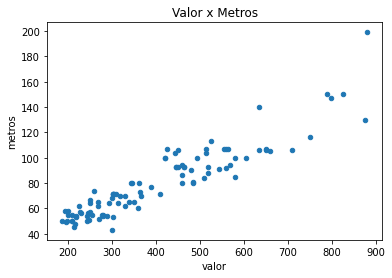

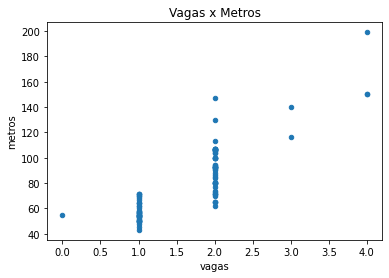

In [988]:
## Gráficos de dispersão metros x valor e metros x quartos.
df.plot.scatter(x='valor',
                   y='metros',
                title='Valor x Metros'
                  )

df.plot.scatter(x='vagas',
                   y='metros',
                title='Vagas x Metros'
                  )

### __(BONUS: 1 ponto extra.)__ Análise de Outliers
*Esse é um ponto extra, faça se quiser...

Realize a análise e o tratamento de **outliers**, como referência para estudo:

* [link1](https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/)
* [link2](https://towardsdatascience.com/4-machine-learning-techniques-for-outlier-detection-in-python-21e9cfacb81d)
* [link3](https://minerandodados.com.br/tratando-outliers-python/)

**Pergunta:** Foram localizados outliers? Qual o método de análise adotado? Se existe, como os dados foram tratados (foram removidos ou mantidos)? 

## 3. Desenvolvimento do Modelo

**Pergunta:** O conjunto de dados indica a aplicação de qual modelo de aprendizagem de maquina para determinação do valor de um imóvel? Por que ? 

**Resposta:**

    [ ] Aprendizado por reforço
    [X] Aprendizado supervisionado
    [ ] Aprendizado não supervisionado

**Pergunta:** Qual a técnica sugerida para este projeto?

**Resposta:**

    [X] Regressão
    [ ] Classificação
    [ ] Clusterização

**Pergunta:** Escolha 2 modelos de algoritmos para testar a performance de cada um deles.

**Resposta:**

1. algoritimo Regressão linear
2. algoritimo Random forest

__(BONUS: 1 ponto extra.)__ **Pergunta:** Explique como cada algoritmo funciona.


**Resposta:**

1. algoritimo Regressão linear: é a verificação da existência de um relacionamento entre duas variáveis. Para tanto, a regressão linear usa os pontos de dados para encontrar a melhor linha para essa relação. Além disso, o resultado da regressão linear será sempre um número.

2. algoritimo Random forest: cria árvores de decisões, de maneira aleatória, para chegar a uma melhor previsão do que uma única árvore poderia fazer sozinha.

## 4. Treinamento e teste do modelo

Crie um subset dos dados apenas com os atributos que serão utilizados para o treinameno e teste do modelo. Divida o subset em conjunto de treinamento e teste.

In [989]:
# Subset de dados com os valores metros e vagas como colunas descritivas para a variável X.
# Escolhemos metros e vagas, pois foram as maiores correlações encontradas

X = df[['metros', 'vagas']] # Colunas descritivas

# Subset de dados com o valor como alvo para variável Y.
Y = df['valor'] # Valor alvo

In [990]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2,random_state = 42)
print(X_treino.shape)
print(X_teste.shape)
print(Y_treino.shape)
print(Y_teste.shape)

(80, 2)
(20, 2)
(80,)
(20,)


In [991]:
X_treino.head()

,metros,vagas
55,100,2
88,130,2
26,104,2
42,64,1
69,67,1


In [992]:
Y_treino.head()

55    605
88    875
26    445
42    315
69    250
Name: valor, dtype: int64

Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.

### Algoritmo 1

In [993]:
#Seu Código aqui...

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()

lin_model.fit(X_treino, Y_treino)

LinearRegression()

In [994]:
y_teste_predito = lin_model.predict(X_teste)
print("Predição usando regressão, retorna valores continuos: {}".format(y_teste_predito))

Predição usando regressão, retorna valores continuos: [267.0758782  474.75105291 292.56798683 256.87903474 261.97745647
 433.96367909 331.99524455 439.06210082 510.440005   546.12895709
 408.47157045 750.06582617 221.19008265 362.58577491 449.25894427
 469.65263118 333.35536065 331.99524455 331.99524455 377.88104009]


In [995]:
print('(A) Intercepto: ', lin_model.intercept_)
print('(B) Inclinação: ', lin_model.coef_)
if len(lin_model.coef_)>1:
    print('Nossa equação é: Y_pred = {} + {} * X_LSTAT + {} * X_RM'.format(lin_model.intercept_.round(2),lin_model.coef_[0].round(2),lin_model.coef_[1].round(2)) )
else: 
        print('Nossa equação é: Y_pred = {} + {} * X_LSTAT'.format(lin_model.intercept_.round(2),lin_model.coef_[0].round(2)))

(A) Intercepto:  -47.66615278426474
(B) Inclinação:  [ 5.09842173 24.13199253]
Nossa equação é: Y_pred = -47.67 + 5.1 * X_LSTAT + 24.13 * X_RM


Text(0, 0.5, 'Valor Predito')

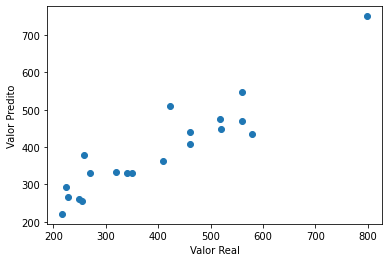

In [996]:
plt.scatter(Y_teste,y_teste_predito)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')

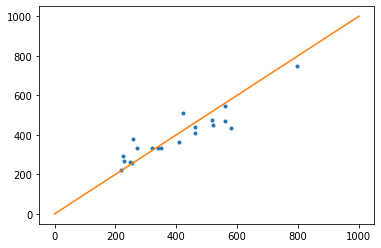

In [997]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
import numpy as np

y_teste_predito = lin_model.predict(X_teste)

plt.plot(Y_teste, y_teste_predito, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 1000, 100)
y = x
plt.plot(x, y)
plt.show()

In [998]:
print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((y_teste_predito - Y_teste)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(Y_teste, y_teste_predito))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(Y_teste, y_teste_predito))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % np.sqrt(mean_squared_error(Y_teste, y_teste_predito)))
print("R2-score: %.2f" % r2_score(y_teste_predito , Y_teste) )

Soma dos Erros ao Quadrado (SSE): 76949 
Erro Quadrático Médio (MSE): 3847.44
Erro Médio Absoluto (MAE): 48.42
Raiz do Erro Quadrático Médio (RMSE): 62.03 
R2-score: 0.74


In [999]:
# Passando somente a metragem e a quantidade de vagas de garagem do imóvel solicitado, 
# chegamos a um valor de imóvel satisfatório, aproximadamente R$ 332 mil reais.

lin_model.predict([[65, 2]])


array([331.99524455])

In [1000]:
# Segunda tentativa com mais atributos na coluna descritiva

In [1001]:
import numpy as np
from sklearn.preprocessing import LabelEncoder# creating initial dataframe

In [1002]:
#Conforme sugerido, usamos o LabelEncoder para transformar a coluna bairro (obj) em números (int), 
# que vão de 0 a 16, sendo 2 o bairro Centro


bridge_df = pd.DataFrame(df, columns=['bairro'])# creating instance of labelencoder
labelencoder = LabelEncoder()# Assigning numerical values and storing in another column
bridge_df['BairroNew'] = labelencoder.fit_transform(bridge_df['bairro'])
bridge_df

df['newbairro'] = bridge_df['BairroNew']

In [1003]:
df.head()

,metros,valor,quartos,vagas,reformado,bairro,newbairro
0,107,560,3,2,0,Vila Lusitania,16
1,107,555,3,2,1,Vila Lusitania,16
2,49,196,2,1,0,Ferrazopolis,4
3,104,515,3,2,1,Centro,2
4,92,560,3,2,1,Vila Lusitania,16


In [1004]:
# passamos todos os valores para as colunas descritivas e bairro com um valor numérico, 
# em busca de um melhor resultado

X = df[['metros', 'quartos', 'vagas', 'reformado', 'newbairro']] # Colunas descritivas
Y = df['valor'] # Valor alvo

In [1005]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2, random_state = 57)
print(X_treino.shape)
print(X_teste.shape)
print(Y_treino.shape)
print(Y_teste.shape)

(80, 5)
(20, 5)
(80,)
(20,)


In [1006]:
X_treino.head()

,metros,quartos,vagas,reformado,newbairro
39,85,3,2,1,2
62,150,3,4,1,7
71,73,2,2,0,2
34,54,2,1,1,0
90,88,3,2,0,2


In [1007]:
lin_model = LinearRegression()

lin_model.fit(X_treino, Y_treino)

LinearRegression()

In [1008]:
y_teste_predito = lin_model.predict(X_teste)
print("Predição usando regressão, retorna valores continuos: {}".format(y_teste_predito))

Predição usando regressão, retorna valores continuos: [576.41489165 300.90588781 520.31036518 540.32141463 477.11878275
 245.25308975 482.12154511 464.65756712 228.90480185 238.59532444
 256.77689116 396.89630907 229.48566432 472.36238856 273.61466097
 252.84826928 544.70176492 230.24480266 323.6422846  511.37898094]


In [1009]:
print('(A) Intercepto: ', lin_model.intercept_)
print('(B) Inclinação: ', lin_model.coef_)
if len(lin_model.coef_)>1:
    print('Nossa equação é: Y_pred = {} + {} * X_LSTAT + {} * X_RM'.format(lin_model.intercept_.round(2),lin_model.coef_[0].round(2),lin_model.coef_[1].round(2)) )
else: 
        print('Nossa equação é: Y_pred = {} + {} * X_LSTAT'.format(lin_model.intercept_.round(2),lin_model.coef_[0].round(2)))

(A) Intercepto:  -58.773703732887554
(B) Inclinação:  [ 5.00276236  9.75915655 21.05862774  8.93138424 -0.75913834]
Nossa equação é: Y_pred = -58.77 + 5.0 * X_LSTAT + 9.76 * X_RM


Text(0, 0.5, 'Valor Predito')

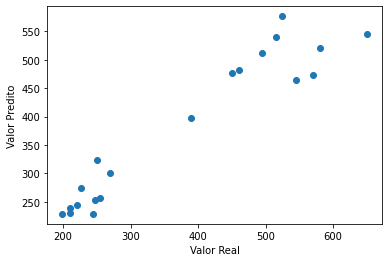

In [1010]:
plt.scatter(Y_teste,y_teste_predito)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')

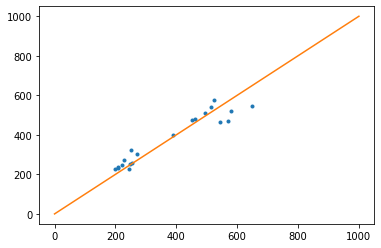

In [1011]:
y_teste_predito = lin_model.predict(X_teste)

plt.plot(Y_teste, y_teste_predito, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 1000, 100)
y = x
plt.plot(x, y)
plt.show()

In [1012]:
print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((y_teste_predito - Y_teste)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(Y_teste, y_teste_predito))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(Y_teste, y_teste_predito))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % np.sqrt(mean_squared_error(Y_teste, y_teste_predito)))
print("R2-score: %.2f" % r2_score(y_teste_predito , Y_teste) )

Soma dos Erros ao Quadrado (SSE): 47053 
Erro Quadrático Médio (MSE): 2352.64
Erro Médio Absoluto (MAE): 38.53
Raiz do Erro Quadrático Médio (RMSE): 48.50 
R2-score: 0.85


In [1013]:
# Obtivemos melhor resultado passando mais parâmetros para o X, nossa coluna preditiva.

### Algoritmo 2

In [1014]:
#Seu Código aqui...

# Usando Random forest


from sklearn.ensemble import RandomForestRegressor

# Cria o modelo de regressão
randomForest = RandomForestRegressor()
# Cria o modelo de machine learning
randomForest.fit(X_treino, Y_treino)



RandomForestRegressor()

In [1015]:
# Para obter as previsões, basta chamar o método predict()
y_teste_predito = randomForest.predict(X_teste)
print("Predição usando regressão, retorna valores continuos: {}".format(y_teste_predito))

Predição usando regressão, retorna valores continuos: [714.9        251.04       514.7        509.34       467.77895238
 249.32       467.77895238 517.29833333 211.39       207.438
 238.24       339.86333333 219.12       467.77895238 225.7025
 249.31       539.39       218.08       321.66       544.16533333]


Text(0, 0.5, 'Valor Predito')

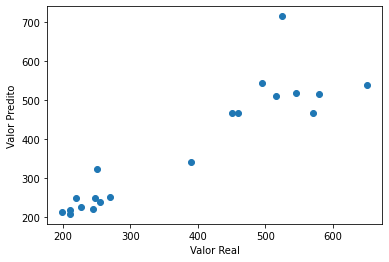

In [1016]:
plt.scatter(Y_teste,y_teste_predito)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')

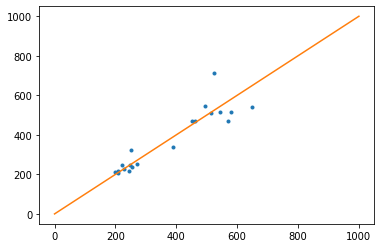

In [1017]:
y_teste_predito = randomForest.predict(X_teste)

plt.plot(Y_teste, y_teste_predito, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 1000, 100)
y = x
plt.plot(x, y)
plt.show()

In [1018]:
print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((y_teste_predito - Y_teste)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(Y_teste, y_teste_predito))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(Y_teste, y_teste_predito))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % np.sqrt(mean_squared_error(Y_teste, y_teste_predito)))
print("R2-score: %.2f" % r2_score(y_teste_predito , Y_teste) )

Soma dos Erros ao Quadrado (SSE): 76654 
Erro Quadrático Médio (MSE): 3832.71
Erro Médio Absoluto (MAE): 40.77
Raiz do Erro Quadrático Médio (RMSE): 61.91 
R2-score: 0.83


In [1019]:
# Aproximadamente o mesmo resultado que o algoritmo anterior.

Sumarize na tabela abaixo os resultados obtidos para os conjuntos de dados de treino e de teste

**Resposta:**

|    | algoritmo1 | algoritmo2 |
|:---:|:---:|:---:|
| treino | X | X |
| teste  | X | X |

In [1027]:
print(y_teste_predito.mean())

373.71471785714283


In [1055]:

dfResultado = {'algoritmo1': [lin_model.predict(X_treino).mean(), lin_model.predict([[65, 2, 2, 1, 2]])[0]],
               'algoritmo2': [randomForest.predict(X_treino).mean(), randomForest.predict([[65, 2, 2, 1, 2]])[0]]}

dfResultado = pd.DataFrame(dfResultado, index=['treino','teste'])

dfResultado = pd.DataFrame(data=dfResultado)

dfResultado.head()

,algoritmo1,algoritmo2
treino,409.750000,407.68029
teste,335.454526,341.38000


**Pergunta:** Qual dos algoritmos obteve um resultado melhor? Justifique

**Resposta:** O segundo algoritmo é melhor, pois chegou em um resultado mais próximo ao esperado, ou seja, 341 mil, quando o esperado era 350 mil.

## Modelo de produção: Teste com novos dados

Use seu modelo treinado para determinar: 

**`Quanto vale um apartamento de 65m2 com 2 quartos, 2 vagas, reformado no Centro?`**

In [964]:
#Seu Código aqui...

# Passando para o modelo os valores solicitados, ou seja: 65m2 com 2 quartos, 2 vagas, reformado no Centro

# Regressão linear
resposta = lin_model.predict([[65, 2, 2, 1, 2]])
print(f"O imóvel vale R$ {resposta[0]} usando Regressão linear")

O imóvel vale R$ 335.45452595151255 usando Regressão linear


In [965]:
#  Random forest

resposta2 = randomForest.predict([[65, 2, 2, 1, 2]])
print(f"O imóvel vale R$ {resposta2[0]} usando Random forest")

O imóvel vale R$ 346.105 usando Random forest


## 5. Conclusões finais

Ufa!!... Chegamos ao final. Parabéns! De forma simplificada e completa, passamos por todas as etapas de um projeto de aprendizado de maquina. Outras etapas podem ser adicionadas no tratamento dos dados e desenvolvimento do modelo.


**Pergunta:**: O modelo desenvolvido obteve um resultado satisfatório? Justifique:

**Resposta**: Sim, o modelo tem resultado satisfatório, pois o R2-score sempre resultou acima de 0.7, quando usamos duas colunas descritivas (metros e vagas) com o modelo de Regressão Lienar e ainda melhor quando usamos todas as colunas da tabela original como descritivas e utilizamos o modelo Random forest.

**Pergunta:**: O que faria diferente para melhorar resultado obtido? Justifique:

**Resposta**: Seria interessante utilizar um número maior de dados de imóveis para que o modelo de aprendizado de máquina pudesse aprender melhor, bem como, testar outros algoritmos para tentar encontrar aquele que tem melohor resultado.